In [32]:
#라이브러리 호출
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# #깃허브에서 데이터 가져오기
# !git clone https://github.com/yhlee1627/deeplearning.git
# #파일을 읽어와서 데이터프레임에 저장
# dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)

In [13]:
dataframe = pd.read_csv('./data/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)

In [14]:
#[작성] 읽어온 데이터의 출력
dataframe.head()

,Confirmed
0,24
1,24
2,27
3,27
4,28


In [15]:
#[작성] 필요한 데이터만 저장 및 변환
dataset = dataframe.values
dataset = dataset.astype('float32')

In [16]:
dataset[:5]

array([[24.],
       [24.],
       [27.],
       [27.],
       [28.]], dtype=float32)

In [17]:
# 정규화
scaler = MinMaxScaler(feature_range=(0, 1)) # feature_range -> 정규화 값의 범위
Dataset = scaler.fit_transform(dataset)

# 훈련셋과 테스트셋 분리
# shuffle - X, 시간적인 정보가 중요하기 때문에
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False) 

# 훈련셋과 테스트셋의 크기 확인
len(train_data), len(test_data)

(89, 23)

In [18]:
#데이터의 형태를 바꿔주기 위한 함수
def create_dataset(dataset, look_back=10):
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back-1):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

In [19]:
#인공지능 모델을 개발하기 위한 데이터 생성
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

#[작성] 훈련셋과 테스트셋의 형태 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [26]:
x_train[:10]

array([[0.        , 0.        , 0.00026502],
       [0.        , 0.00026502, 0.00026502],
       [0.00026502, 0.00026502, 0.00035336],
       [0.00026502, 0.00035336, 0.00035336],
       [0.00035336, 0.00035336, 0.00035336],
       [0.00035336, 0.00035336, 0.00035336],
       [0.00035336, 0.00035336, 0.00035336],
       [0.00035336, 0.00035336, 0.0004417 ],
       [0.00035336, 0.0004417 , 0.00053004],
       [0.0004417 , 0.00053004, 0.00061837]], dtype=float32)

In [27]:
y_train[:10]

array([0.00026502, 0.00035336, 0.00035336, 0.00035336, 0.00035336,
       0.00035336, 0.0004417 , 0.00053004, 0.00061837, 0.00238516],
      dtype=float32)

In [28]:
#[작성] 인공지능 모델에 넣어줄 형태로 변환
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

#[작성] 훈련셋과 테스트셋의 형태 확인
X_train.shape, X_test.shape

((85, 1, 3), (19, 1, 3))

In [31]:
X_train[:5], X_test[:5]

(array([[[0.        , 0.        , 0.00026502]],
 
        [[0.        , 0.00026502, 0.00026502]],
 
        [[0.00026502, 0.00026502, 0.00035336]],
 
        [[0.00026502, 0.00035336, 0.00035336]],
 
        [[0.00035336, 0.00035336, 0.00035336]]], dtype=float32),
 array([[[0.95247346, 0.95282686, 0.9538869 ]],
 
        [[0.95282686, 0.9538869 , 0.955477  ]],
 
        [[0.9538869 , 0.955477  , 0.95848054]],
 
        [[0.955477  , 0.95848054, 0.9615724 ]],
 
        [[0.95848054, 0.9615724 , 0.96395755]]], dtype=float32))

In [38]:
#[작성] RNN(순환신경망)생성
model = Sequential()

model.add(Input(shape=(1, look_back)))
model.add(SimpleRNN(3))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss="mse", optimizer='adam')

In [40]:
#[작성] 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.8912 
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.5170
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.2471
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.1204
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.0748
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.0549
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.0430
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.0320
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.0242
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.0175


In [41]:
#[작성] 데이터 예측
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [42]:
#모델의 정확도 측정
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1404.48 RMSE
Test Score: 1488.03 RMSE


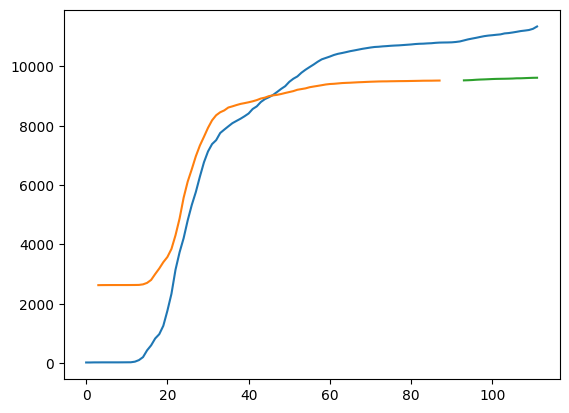

In [43]:
#결과를 그래프로 확인하기
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()